In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
from math import sqrt, ceil
from scipy.stats import linregress


In [8]:
directory = "C:/Users\qvled\OneDrive - HvA\Logfiles\H2A/2023/Nogaro/20230525_h2a_poging1/0002/"
    #"../../HvA/CleanMobility - E-team/Logfiles/H2A/2023/Nogaro/20230525_h2a_poging1/0002/"
file_master = "1.csv"
file_motordriver ="5.csv"
file_FCC = "4.csv"
file_richting = "F.csv"

In [9]:
data_file_motordriver = lib.DataInladenMotorDriver(f'{directory}{file_motordriver}')
data_file_master = lib.DataInladen(f'{directory}{file_master}')
data_file_FCC = lib.DataInladenFCC(f'{directory}{file_FCC}')
data_file_richting = lib.DataInladen(f'{directory}{file_richting}')

NameError: name 'lib' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def convert_to_decimal(degrees_minutes, direction):
    degrees = int(degrees_minutes[:2])
    minutes = float(degrees_minutes[2:])
    decimal = degrees + minutes / 60
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

def lees_gps_data(filepath):
    latitudes = []
    longitudes = []
    hoogtes = []
    
    with open(filepath, 'r') as file:
        for regel in file:
            if regel.startswith('$GPGGA'):
                delen = regel.split(',')
                if len(delen) > 9:
                    latitude = delen[2]
                    lat_direction = delen[3]
                    longitude = delen[4]
                    lon_direction = delen[5]
                    hoogte = delen[9]
                    
                    # Converteren van NMEA formaat naar decimale graden
                    if latitude and longitude:
                        dec_lat = convert_to_decimal(latitude, lat_direction)
                        dec_lon = convert_to_decimal(longitude, lon_direction)
                        latitudes.append(dec_lat)
                        longitudes.append(dec_lon)
                        
                    # Hoogte extraheren
                    try:
                        hoogte = float(hoogte)
                        hoogtes.append(hoogte)
                    except ValueError:
                        continue

    # Maak een DataFrame van de verzamelde gegevens
    data = pd.DataFrame({
        'latitude': latitudes,
        'longitude': longitudes,
        'hoogte': hoogtes
    })
    return data

# Bestandspad instellen
file_path = 'C:/Users/qvled/OneDrive - HvA/Clean_Mobility_Files/H2A/Data voor hoogteprofiel.txt'

# Lees de GPS-data
df = lees_gps_data(file_path)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'hoogte'

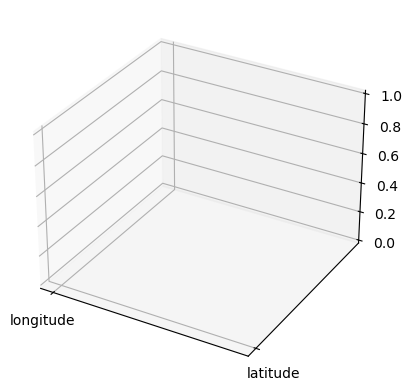

In [3]:
file_path = 'C:/Users/qvled/OneDrive - HvA/Clean_Mobility_Files/H2A/Data voor hoogteprofiel.txt'
latitudes, longitudes, hoogtes = lees_gps_data(file_path)

def plot_hoogteprofiel(latitudes, longitudes, hoogtes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(longitudes, latitudes, hoogtes, c=hoogtes, cmap='viridis')
    ax.set_title('3D Hoogteprofiel')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Hoogte (m)')
    plt.show()

plot_hoogteprofiel(latitudes, longitudes, hoogtes)


In [4]:
def filter_data(data, min_lon, max_lon, min_lat, max_lat, min_hoogte, max_hoogte):
    """ Filter de punten die zich binnen de gedefinieerde pitstraat coördinaten en irreële hoogtes bevinden. """
    gefilterde_data = data[
        ((data['longitude'] < min_lon) | (data['longitude'] > max_lon) |
         (data['latitude'] < min_lat) | (data['latitude'] > max_lat)) &
        (data['hoogte'] >= min_hoogte) & (data['hoogte'] <= max_hoogte)
    ]
    return gefilterde_data

# Filtergrenzen instellen
min_lon = -0.043
max_lon = -0.042
min_lat = 0.002
max_lat = 0.003
min_hoogte = 96
max_hoogte = 105

# Pas de filter toe
gefilterde_data = filter_data(df, min_lon, max_lon, min_lat, max_lat, min_hoogte, max_hoogte)


In [24]:


def plot_hoogteprofiel_2d(latitudes, longitudes, hoogtes):
    fig, ax = plt.subplots()
    scatter = ax.scatter(longitudes, latitudes, c=hoogtes, cmap='viridis', marker='o')
    ax.set_title('2D Hoogteprofiel met Kleuren Heatmap')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Hoogte (m)')
    plt.grid(True)
    plt.show()

plot_hoogteprofiel_2d(gefilterde_data['latitude'], gefilterde_data['longitude'], gefilterde_data['hoogte'])


KeyError: 'longitude'